# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## Data Domain Knowledge

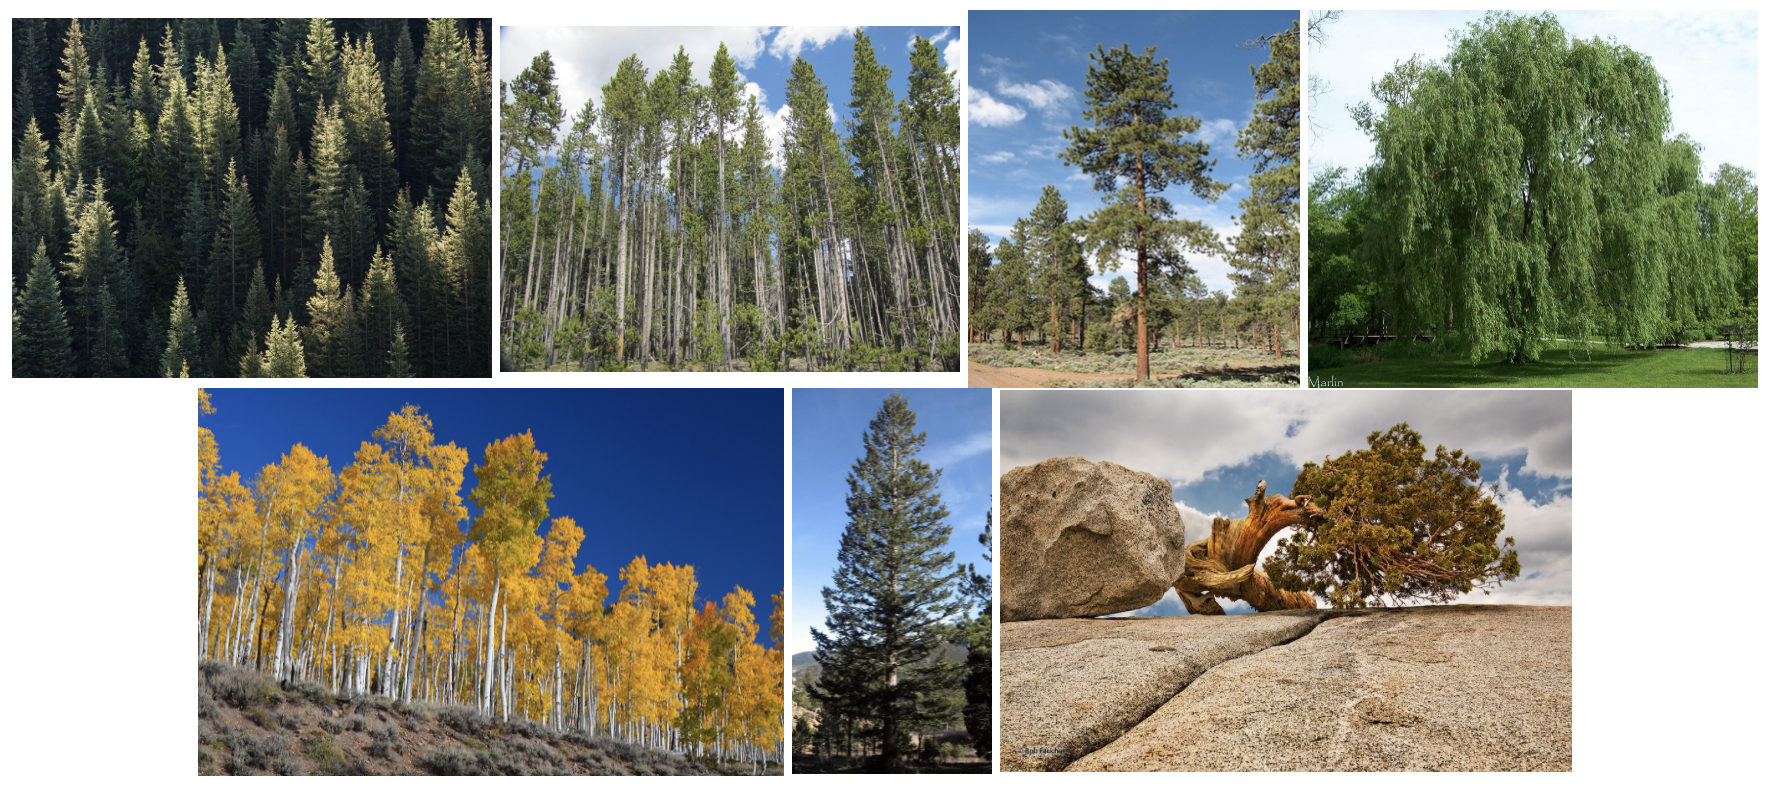

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

- The goal of the Project (and competition): to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.
- Four wilderness areas are:
    - 1: Rawah
    - 2: Neota
    - 3: Comanche Peak
    - 4: Cache la Poudre
    
- Seven categories numbered from 1 to 7 in the Cover_Type column, to be classified:
    - 1: Spruce/Fir
    - 2: Lodgepole Pine
    - 3: Ponderosa Pine
    - 4: Cottonwood/Willow
    - 5: Aspen
    - 6: Douglas-fir
    - 7: Krummholz
    
- Categorical Features >> 'Wilderness_Area', 'Soil_Type', 'Cover_Type'

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.float_format = "{:.3f}".format
#plt.rcParams["figure.figsize"] = (12,7)

#### *ii. Load Dataset*

In [3]:
df = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     31                               270   
4       3248      93     12                               507   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             4369   
3                             175                             1320   
4                             118                              570   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                2113  ...             0             0   
1                                3960  ...             0             0   
2                                1330  ...             0             0   
3                                 889  ...             0             0   
4                                 945  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           6  
1             0             0           1  
2             0             0           7  
3             0             0           5  
4             0             0           7  

[5 rows x 55 columns]

In [5]:
df.shape

(250000, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [7]:
df.describe().T

count     mean      std      min  \
Elevation                          250000.000 2748.505  418.301 1859.000   
Aspect                             250000.000  156.212  109.653    0.000   
Slope                              250000.000   16.331    8.317    0.000   
Horizontal_Distance_To_Hydrology   250000.000  228.094  209.630    0.000   
Vertical_Distance_To_Hydrology     250000.000   50.898   61.007 -163.000   
Horizontal_Distance_To_Roadways    250000.000 1719.967 1330.818    0.000   
Hillshade_9am                      250000.000  212.370   30.655    0.000   
Hillshade_Noon                     250000.000  218.511   22.681    0.000   
Hillshade_3pm                      250000.000  134.503   46.034    0.000   
Horizontal_Distance_To_Fire_Points 250000.000 1521.757 1107.378    0.000   
Wilderness_Area_1                  250000.000    0.238    0.426    0.000   
Wilderness_Area_2                  250000.000    0.033    0.180    0.000   
Wilderness_Area_3                  250000.000    0.418    0.493    0.000   
Wilderness_Area_4                  250000.000    0.309    0.462    0.000   
Soil_Type_1                        250000.000    0.018    0.134    0.000   
Soil_Type_2                        250000.000    0.036    0.186    0.000   
Soil_Type_3                        250000.000    0.058    0.234    0.000   
Soil_Type_4                        250000.000    0.047    0.211    0.000   
Soil_Type_5                        250000.000    0.009    0.095    0.000   
Soil_Type_6                        250000.000    0.037    0.190    0.000   
Soil_Type_7                        250000.000    0.000    0.008    0.000   
Soil_Type_8                        250000.000    0.000    0.010    0.000   
Soil_Type_9                        250000.000    0.001    0.025    0.000   
Soil_Type_10                       250000.000    0.126    0.332    0.000   
Soil_Type_11                       250000.000    0.024    0.152    0.000   
Soil_Type_12                       250000.000    0.016    0.124    0.000   
Soil_Type_13                       250000.000    0.032    0.176    0.000   
Soil_Type_14                       250000.000    0.006    0.079    0.000   
Soil_Type_15                       250000.000    0.000    0.002    0.000   
Soil_Type_16                       250000.000    0.005    0.068    0.000   
Soil_Type_17                       250000.000    0.031    0.172    0.000   
Soil_Type_18                       250000.000    0.004    0.059    0.000   
Soil_Type_19                       250000.000    0.003    0.053    0.000   
Soil_Type_20                       250000.000    0.008    0.087    0.000   
Soil_Type_21                       250000.000    0.001    0.025    0.000   
Soil_Type_22                       250000.000    0.022    0.147    0.000   
Soil_Type_23                       250000.000    0.048    0.213    0.000   
Soil_Type_24                       250000.000    0.015    0.123    0.000   
Soil_Type_25                       250000.000    0.000    0.015    0.000   
Soil_Type_26                       250000.000    0.003    0.056    0.000   
Soil_Type_27                       250000.000    0.001    0.029    0.000   
Soil_Type_28                       250000.000    0.001    0.024    0.000   
Soil_Type_29                       250000.000    0.085    0.278    0.000   
Soil_Type_30                       250000.000    0.047    0.212    0.000   
Soil_Type_31                       250000.000    0.020    0.140    0.000   
Soil_Type_32                       250000.000    0.042    0.200    0.000   
Soil_Type_33                       250000.000    0.040    0.196    0.000   
Soil_Type_34                       250000.000    0.002    0.039    0.000   
Soil_Type_35                       250000.000    0.006    0.080    0.000   
Soil_Type_36                       250000.000    0.000    0.020    0.000   
Soil_Type_37                       250000.000    0.002    0.043    0.000   
Soil_Type_38                       250000.000    0.046    0.210    0.000   
Soil_Type_39

In [8]:
df[df.columns].nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

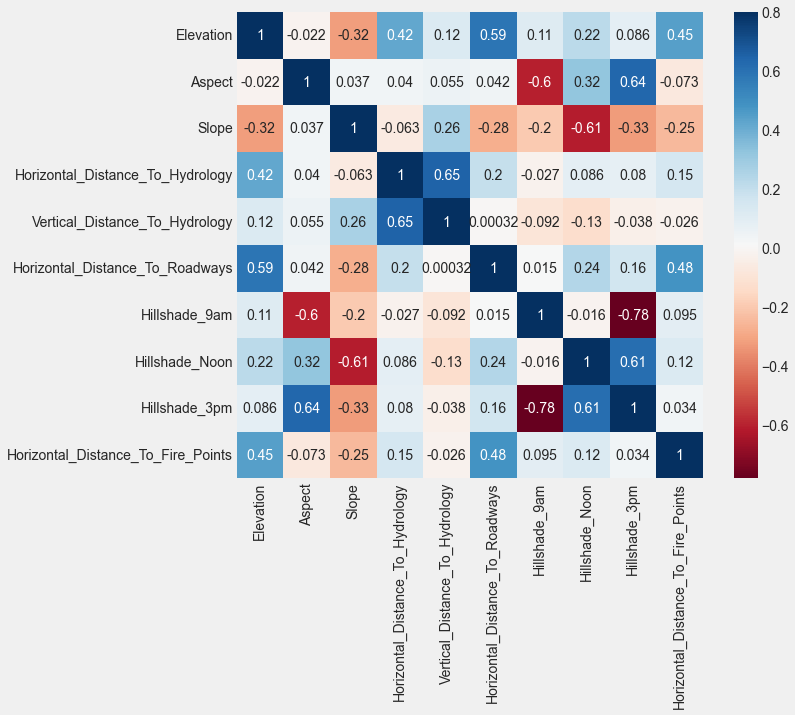

In [9]:
# numeric continous columns corr.

corrmat = df.iloc[:,:10].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, cmap=plt.cm.RdBu, linecolor='white');

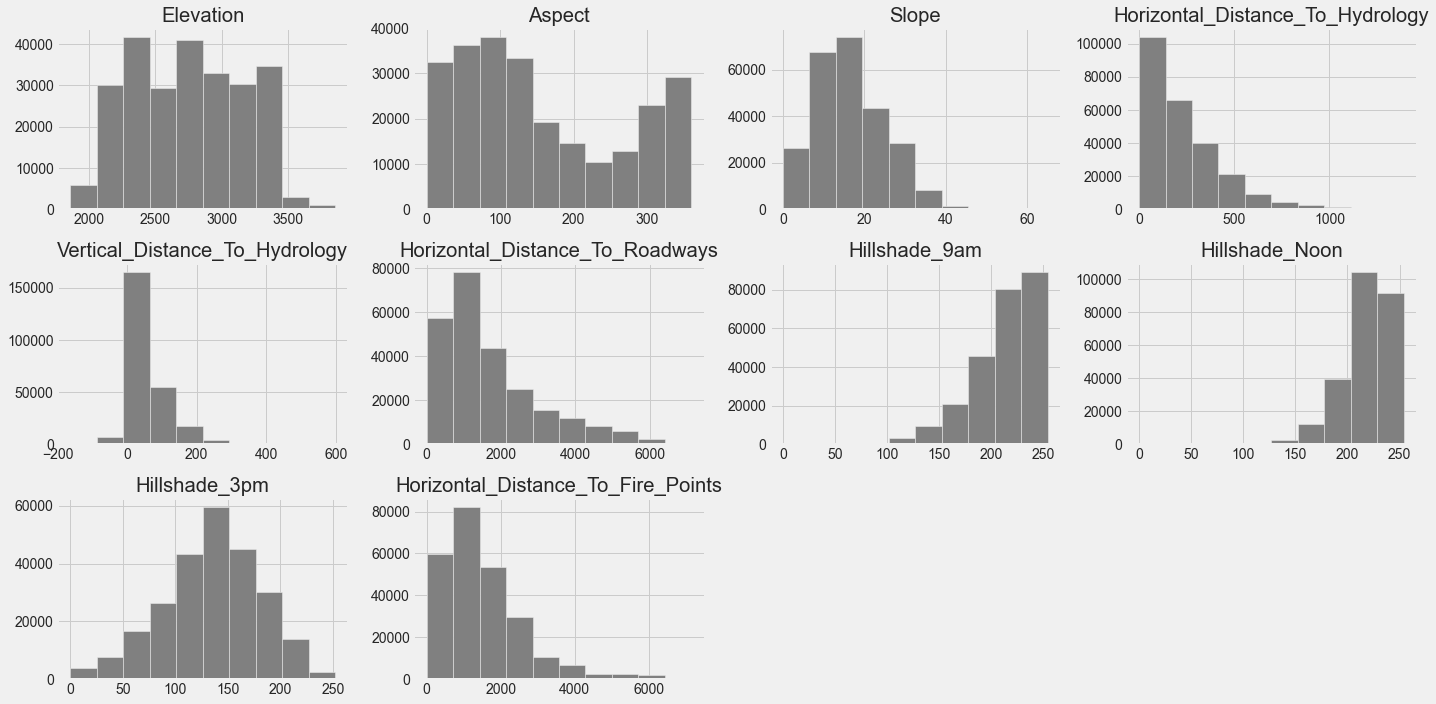

In [10]:
plt.figure(figsize=(20,10))
for idx, col in enumerate(df.iloc[:,:10]):
    plt.subplot(3, 4, idx+1)
    plt.hist(df[col], color="grey")
    plt.title(col)
plt.tight_layout();


In [11]:
# Check class balance

df.Cover_Type.value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

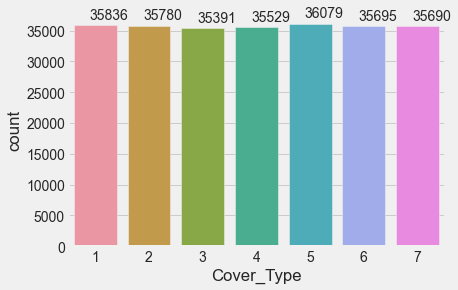

In [12]:
ax = sns.countplot(df.Cover_Type)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));
    
# Target sütunumuz olan cover_type verilerinin balance bir şekilde dağıldığını görüyoruz.

In [13]:
df.iloc[:,:10].describe().T

count     mean      std      min  \
Elevation                          250000.000 2748.505  418.301 1859.000   
Aspect                             250000.000  156.212  109.653    0.000   
Slope                              250000.000   16.331    8.317    0.000   
Horizontal_Distance_To_Hydrology   250000.000  228.094  209.630    0.000   
Vertical_Distance_To_Hydrology     250000.000   50.898   61.007 -163.000   
Horizontal_Distance_To_Roadways    250000.000 1719.967 1330.818    0.000   
Hillshade_9am                      250000.000  212.370   30.655    0.000   
Hillshade_Noon                     250000.000  218.511   22.681    0.000   
Hillshade_3pm                      250000.000  134.503   46.034    0.000   
Horizontal_Distance_To_Fire_Points 250000.000 1521.757 1107.378    0.000   

                                        25%      50%      75%      max  
Elevation                          2375.000 2753.000 3108.000 3857.000  
Aspect                               65.000  125.000  260.000  360.000  
Slope                                10.000   15.000   22.000   65.000  
Horizontal_Distance_To_Hydrology     66.000  180.000  330.000 1390.000  
Vertical_Distance_To_Hydrology        5.000   32.000   79.000  598.000  
Horizontal_Distance_To_Roadways     756.000 1318.000 2294.000 7112.000  
Hillshade_9am                       195.000  220.000  235.000  254.000  
Hillshade_Noon                      206.000  222.000  235.000  254.000  
Hillshade_3pm                       106.000  137.000  167.000  252.000  
Horizontal_Distance_To_Fire_Points  734.000 1273.000 1998.000 7150.000

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [14]:
df.isna().sum().any()

False

In [15]:
df.duplicated().value_counts() 

# 2521 adet duplicated satır var. bunları drop edelim.

False    247479
True       2521
dtype: int64

In [16]:
df[df.duplicated() == True].head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
4668       2842      64     18                               549   
5475       2322      97     29                               270   
7377       2259      24      3                                 0   
7766       3253      74     10                               199   
9139       2130      41      5                                 0   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
4668                             168                              574   
5475                             125                              647   
7377                               0                              751   
7766                              26                             4280   
9139                               0                              958   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
4668            233             198             89   
5475            251             184             39   
7377            217             232            151   
7766            233             219            118   
9139            220             227            142   

      Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
4668                                2410  ...             0             0   
5475                                1655  ...             0             0   
7377                                 607  ...             0             0   
7766                                2405  ...             0             0   
9139                                 649  ...             0             0   

      Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
4668             0             0             0             0             0   
5475             0             0             0             0             0   
7377             0             0             0             0             0   
7766             0             0             0             0             1   
9139             0             0             0             0             0   

      Soil_Type_39  Soil_Type_40  Cover_Type  
4668             0             0           5  
5475             0             0           4  
7377             0             0           4  
7766             0             0           7  
9139             0             0           4  

[5 rows x 55 columns]

In [17]:
df.drop_duplicates(inplace=True) 

# dublicated satırı drop ettik.

In [18]:
df.duplicated().value_counts() 

False    247479
dtype: int64

In [19]:
# Check class balance

df.Cover_Type.value_counts()

1    35835
2    35780
5    35514
7    35481
6    35430
3    35273
4    34166
Name: Cover_Type, dtype: int64

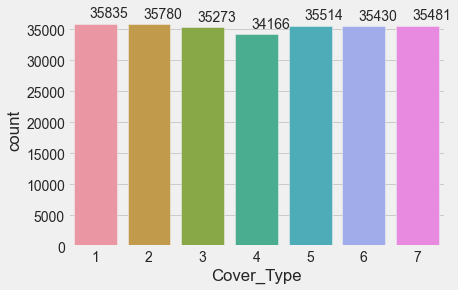

In [20]:
ax = sns.countplot(df.Cover_Type)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

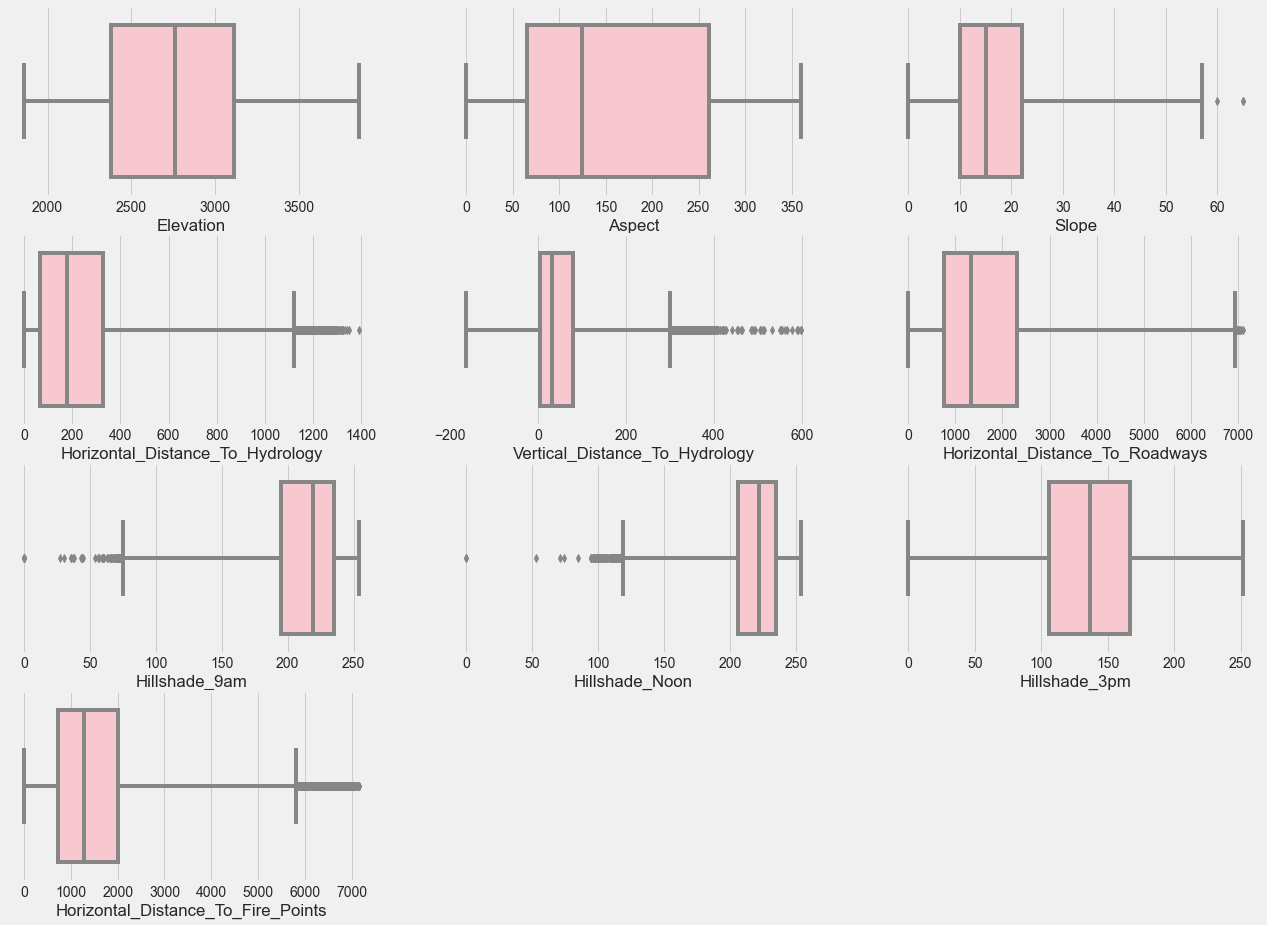

In [21]:
index = 0                          # let's check outliers numeric_features
plt.figure(figsize=(20,15))
for i in df.iloc[:,:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=i, data=df, whis=3, color="pink")

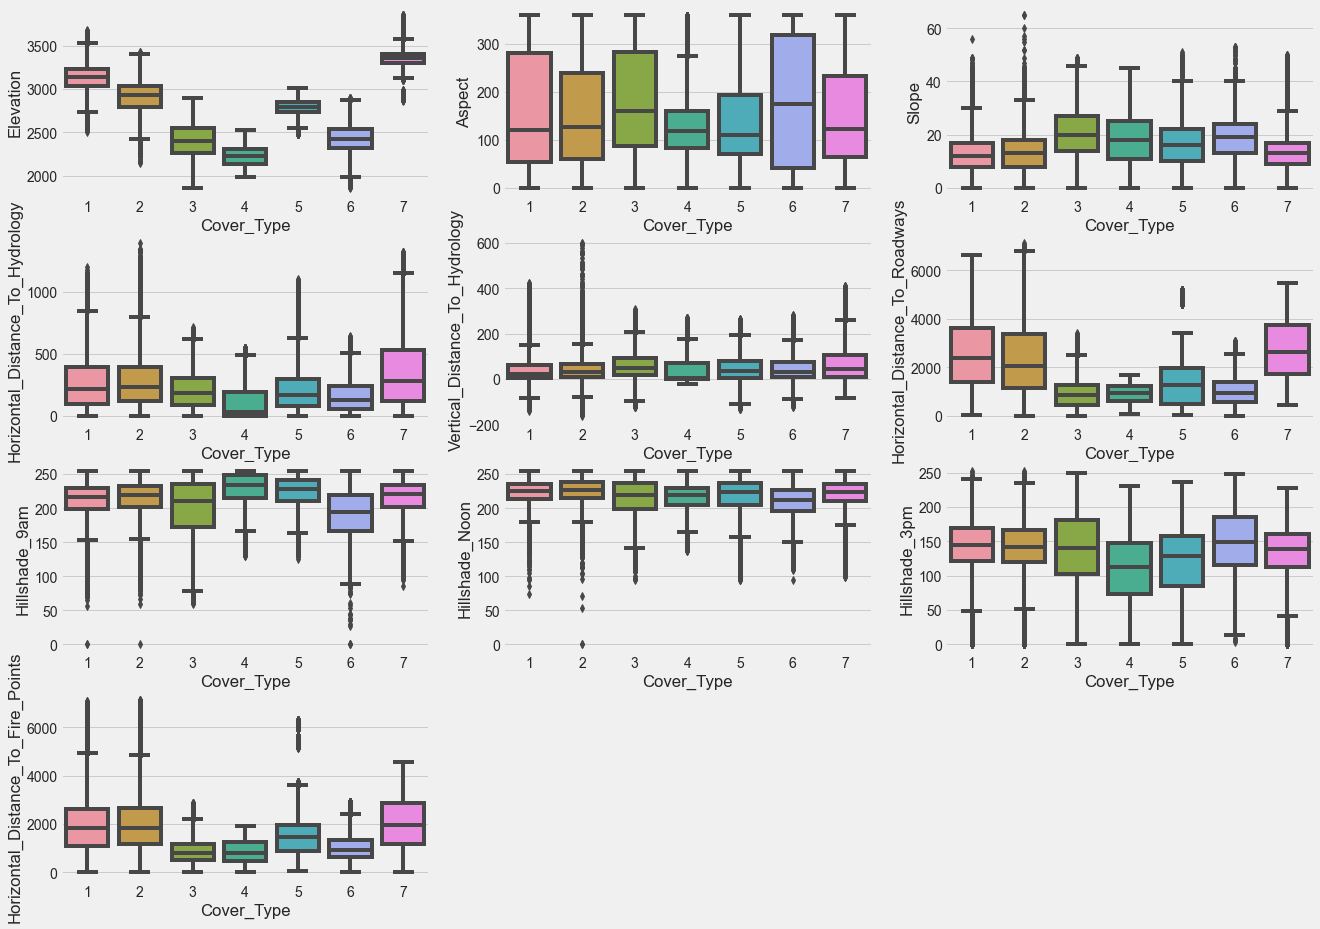

In [22]:
index = 0                          # let's check outliers numeric_features with respect to target (Cover_type) classes
plt.figure(figsize=(20,15))
for i in  df.iloc[:,:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = i, x = "Cover_Type", data = df, whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [23]:
def outlier_function(df, col_name):
   
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [24]:
for column in  df.iloc[:,:10]:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 3 outliers in Slope
There are 762 outliers in Horizontal_Distance_To_Hydrology
There are 956 outliers in Vertical_Distance_To_Hydrology
There are 10 outliers in Horizontal_Distance_To_Roadways
There are 78 outliers in Hillshade_9am
There are 194 outliers in Hillshade_Noon
There are 2334 outliers in Horizontal_Distance_To_Fire_Points


In [25]:
def remove_outlier(df_in, col_name,):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high),col_name]= np.nan

In [26]:
remove_outlier(df, "Slope")

In [27]:
remove_outlier(df, "Horizontal_Distance_To_Hydrology")

In [28]:
remove_outlier(df, "Vertical_Distance_To_Hydrology")

In [29]:
remove_outlier(df, "Horizontal_Distance_To_Roadways")

In [30]:
remove_outlier(df, "Hillshade_9am")

In [31]:
remove_outlier(df, "Hillshade_Noon")

In [32]:
remove_outlier(df, "Horizontal_Distance_To_Fire_Points")

In [33]:
for column in  df.iloc[:,:10]:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

In [34]:
df.iloc[:,:10].isnull().sum()

Elevation                                0
Aspect                                   0
Slope                                    3
Horizontal_Distance_To_Hydrology       762
Vertical_Distance_To_Hydrology         956
Horizontal_Distance_To_Roadways         10
Hillshade_9am                           78
Hillshade_Noon                         194
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    2334
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(243334, 55)

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [37]:
df['Hypotenuse_Horizantal_Vertical'] = (df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)**0.5


In [38]:
df["Average_Hydrology_Roadways"]=(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])/2

In [39]:
df['Average_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] + df['Vertical_Distance_To_Hydrology'])/2


In [40]:
df.drop(["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"], axis=1, inplace=True)

In [41]:
df.shape

(243334, 54)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [42]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [43]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)


### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model_LSVC = LinearSVC(max_iter=2000)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [47]:
model_LSVC.score(X_test_scaled,y_test)

0.6695707563646824

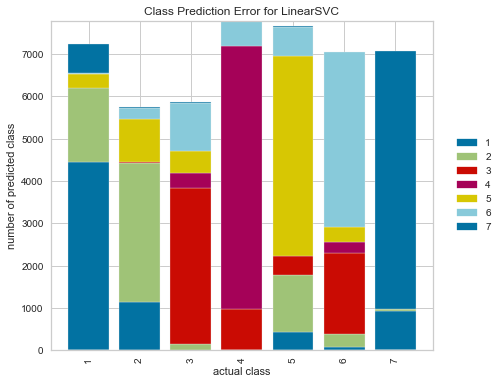

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [48]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

TEST REPORT
[[4559 1296    3    0  323   47  803]
 [1471 3777  142    3 1183  240   38]
 [   0   87 3550 1006  235 2160    0]
 [   0    0  328 6276    0  229    0]
 [ 126 1040  242    0 5337  221    0]
 [   0  148 1247  604  177 4904    0]
 [ 877    4    1    0   30    0 5953]]
              precision    recall  f1-score   support

           1       0.65      0.65      0.65      7031
           2       0.59      0.55      0.57      6854
           3       0.64      0.50      0.57      7038
           4       0.80      0.92      0.85      6833
           5       0.73      0.77      0.75      6966
           6       0.63      0.69      0.66      7080
           7       0.88      0.87      0.87      6865

    accuracy                           0.71     48667
   macro avg       0.70      0.71      0.70     48667
weighted avg       0.70      0.71      0.70     48667




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[18344  5025    25     0  1367   154  3209]
 

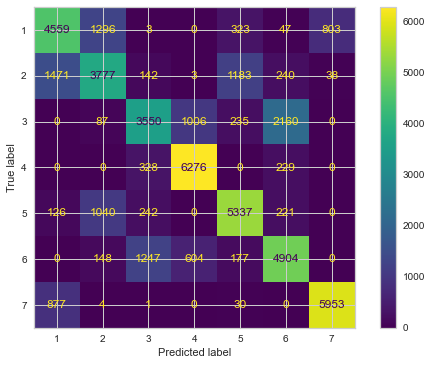

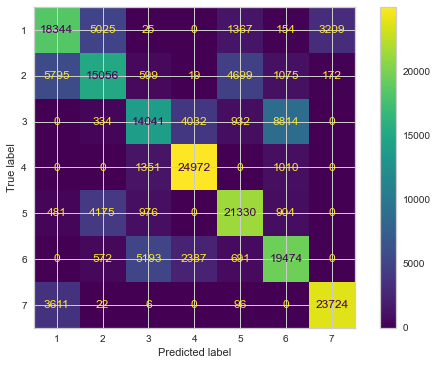

In [51]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

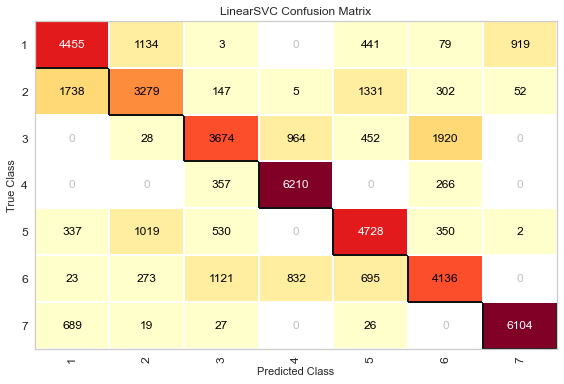

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

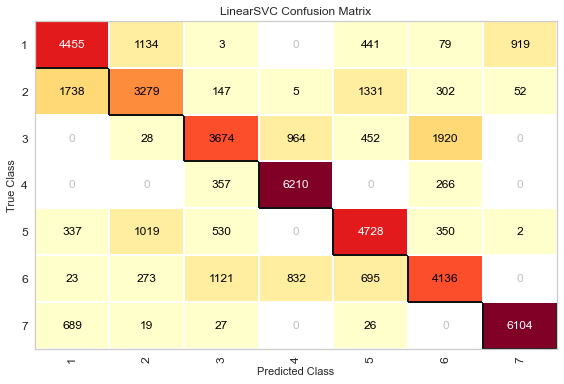

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [54]:
y_test.shape, y_pred_test.shape

((48667,), (48667,))

In [55]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [56]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [57]:
scores


{'model_LSVC': {'f1_score_test': 0.6654001191569482,
  'f1_score_train': 0.6604566172312509,
  'accuracy_score_test': 0.6695707563646824,
  'accuracy_score_train': 0.6645039991369878}}

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [58]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)


DecisionTreeClassifier()

In [59]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [60]:
scores["model_LSVC"], scores["model_Tree"],

({'f1_score_test': 0.6654001191569482,
  'f1_score_train': 0.6604566172312509,
  'accuracy_score_test': 0.6695707563646824,
  'accuracy_score_train': 0.6645039991369878},
 {'f1_score_test': 0.9257545812826466,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9260073561139992,
  'accuracy_score_train': 1.0})

In [61]:
pd.DataFrame(scores)[["model_Tree","model_LSVC"]].T

f1_score_test  f1_score_train  accuracy_score_test  \
model_Tree          0.926           1.000                0.926   
model_LSVC          0.665           0.660                0.670   

            accuracy_score_train  
model_Tree                 1.000  
model_LSVC                 0.665

In [62]:
def eval_model(model,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
    print("TEST REPORT")
    # print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    cm.score(X_train, y_train)
    cm.show()
    # print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

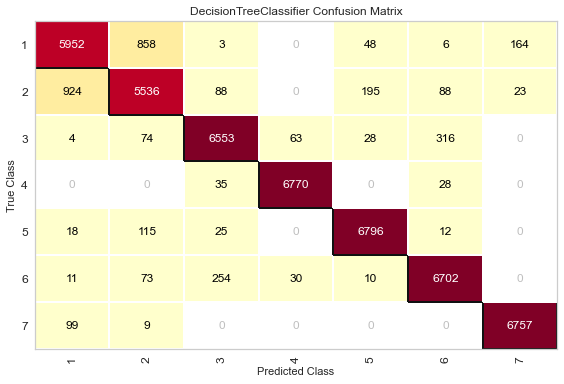

TEST REPORT
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      7031
           2       0.83      0.81      0.82      6854
           3       0.94      0.93      0.94      7038
           4       0.99      0.99      0.99      6833
           5       0.96      0.98      0.97      6966
           6       0.94      0.95      0.94      7080
           7       0.97      0.98      0.98      6865

    accuracy                           0.93     48667
   macro avg       0.93      0.93      0.93     48667
weighted avg       0.93      0.93      0.93     48667




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     28124
           2       1.00      1.00      1.00     27415
           3       1.00      1.00      1.00     28153
           4       1.00      1.00      1.00     27333
           5       1.00      1.00      1.0

In [63]:
eval_model(model_Tree,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [64]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))


In [65]:
df_scores.iloc[:,2:],df_scores.iloc[:,2:].mean()

(    test_accuracy  test_f1_macro
 1           0.918          0.918
 2           0.923          0.923
 3           0.922          0.921
 4           0.925          0.924
 5           0.918          0.917
 6           0.921          0.921
 7           0.920          0.919
 8           0.921          0.921
 9           0.921          0.921
 10          0.921          0.920,
 test_accuracy   0.921
 test_f1_macro   0.921
 dtype: float64)

In [66]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)
model_Tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [67]:
model_Tree_gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [68]:
model_Tree_gs.best_score_

0.9164434930060953

In [69]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

DecisionTreeClassifier()

In [70]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [71]:
pd.DataFrame(scores)

model_LSVC  model_Tree  model_Tree_tuned
f1_score_test              0.665       0.926             0.925
f1_score_train             0.660       1.000             1.000
accuracy_score_test        0.670       0.926             0.925
accuracy_score_train       0.665       1.000             1.000

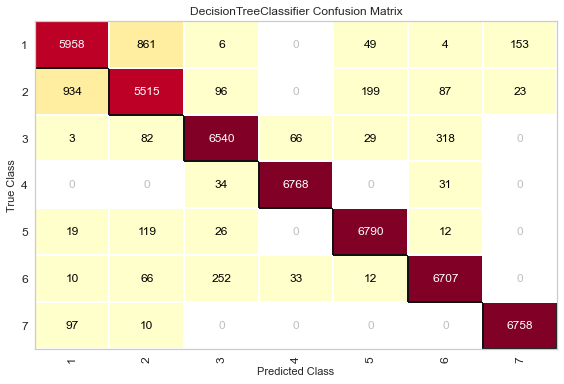

TEST REPORT
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      7031
           2       0.83      0.80      0.82      6854
           3       0.94      0.93      0.93      7038
           4       0.99      0.99      0.99      6833
           5       0.96      0.97      0.97      6966
           6       0.94      0.95      0.94      7080
           7       0.97      0.98      0.98      6865

    accuracy                           0.93     48667
   macro avg       0.92      0.93      0.93     48667
weighted avg       0.92      0.93      0.93     48667




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     28124
           2       1.00      1.00      1.00     27415
           3       1.00      1.00      1.00     28153
           4       1.00      1.00      1.00     27333
           5       1.00      1.00      1.0

In [72]:
eval_model(model_Tree_tuned,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [73]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

f1_train: 0.9227153216455504 f1_test: 0.9013223399374576 
 Accuracy_train: 0.9237723908007007 Accuracy_test: 0.9030143629153224


In [74]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

f1_score_test  f1_score_train  accuracy_score_test  \
model_LSVC                0.665           0.660                0.670   
model_Tree                0.926           1.000                0.926   
model_Tree_tuned          0.925           1.000                0.925   
model_Tree_bagg           0.901           0.923                0.903   

                  accuracy_score_train  
model_LSVC                       0.665  
model_Tree                       1.000  
model_Tree_tuned                 1.000  
model_Tree_bagg                  0.924

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [75]:
model_RF = RandomForestClassifier(n_estimators=100)

model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

f1_score_test  f1_score_train  accuracy_score_test  \
model_LSVC                0.665           0.660                0.670   
model_Tree                0.926           1.000                0.926   
model_Tree_tuned          0.925           1.000                0.925   
model_Tree_bagg           0.901           0.923                0.903   
model_RF                  0.956           1.000                0.956   

                  accuracy_score_train  
model_LSVC                       0.665  
model_Tree                       1.000  
model_Tree_tuned                 1.000  
model_Tree_bagg                  0.924  
model_RF                         1.000

In [77]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='f1_macro', verbose=2)

[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=  12.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=  26.1s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=200; total time=  54.8s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END criterion=gini, max_depth=10, min_samples_split=6, n_estimators=200; total time= 1.6min
[CV] END criterion=gini, max_depth=10, min_samples_split=6, n_estimators=200; total time= 1.6min
[CV] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=100; total time=  44.3s
[CV] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END criterion=gini, max_depth=13, min_samples_split=2, n_estimators=30; total time=  17.7s
[CV] END criterion=gini, max_depth=13, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END criterion=gini, max_d

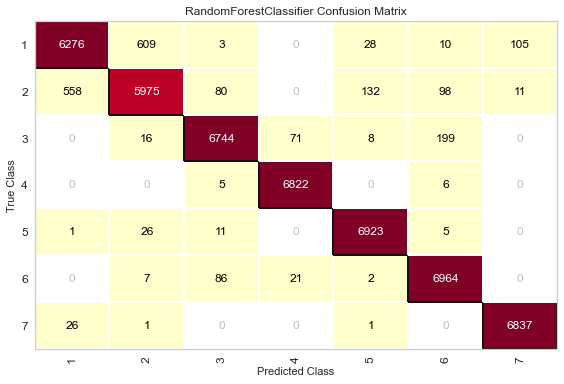

TEST REPORT
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      7031
           2       0.90      0.87      0.89      6854
           3       0.97      0.96      0.97      7038
           4       0.99      1.00      0.99      6833
           5       0.98      0.99      0.98      6966
           6       0.96      0.98      0.97      7080
           7       0.98      1.00      0.99      6865

    accuracy                           0.96     48667
   macro avg       0.96      0.96      0.96     48667
weighted avg       0.96      0.96      0.96     48667




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     28124
           2       1.00      1.00      1.00     27415
           3       1.00      1.00      1.00     28153
           4       1.00      1.00      1.00     27333
           5       1.00      1.00      1.0

In [78]:
eval_model(model_RF,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [79]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [80]:
pd.DataFrame(scores)

model_LSVC  model_Tree  model_Tree_tuned  \
f1_score_test              0.665       0.926             0.925   
f1_score_train             0.660       1.000             1.000   
accuracy_score_test        0.670       0.926             0.925   
accuracy_score_train       0.665       1.000             1.000   

                      model_Tree_bagg  model_RF  
f1_score_test                   0.901     0.956  
f1_score_train                  0.923     1.000  
accuracy_score_test             0.903     0.956  
accuracy_score_train            0.924     1.000

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [81]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

[15:21:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


model_LSVC  model_Tree  model_Tree_tuned  \
f1_score_test              0.665       0.926             0.925   
f1_score_train             0.660       1.000             1.000   
accuracy_score_test        0.670       0.926             0.925   
accuracy_score_train       0.665       1.000             1.000   

                      model_Tree_bagg  model_RF  model_XGB  
f1_score_test                   0.901     0.956      0.911  
f1_score_train                  0.923     1.000      0.928  
accuracy_score_test             0.903     0.956      0.912  
accuracy_score_train            0.924     1.000      0.929

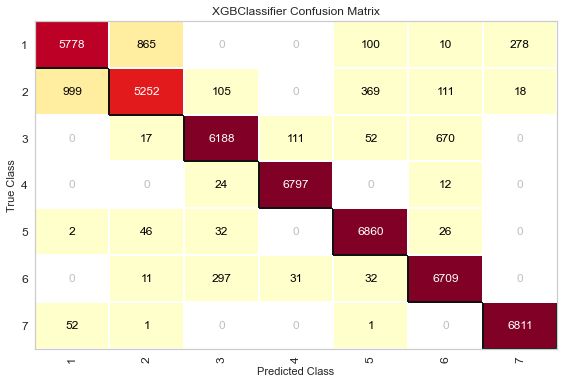

TEST REPORT
              precision    recall  f1-score   support

           1       0.85      0.82      0.83      7031
           2       0.85      0.77      0.81      6854
           3       0.93      0.88      0.90      7038
           4       0.98      0.99      0.99      6833
           5       0.93      0.98      0.95      6966
           6       0.89      0.95      0.92      7080
           7       0.96      0.99      0.97      6865

    accuracy                           0.91     48667
   macro avg       0.91      0.91      0.91     48667
weighted avg       0.91      0.91      0.91     48667




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.87      0.86      0.86     28124
           2       0.88      0.81      0.84     27415
           3       0.95      0.90      0.92     28153
           4       0.99      1.00      0.99     27333
           5       0.94      0.99      0.9

In [82]:
eval_model(model_XGB,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [83]:
fi = pd.DataFrame(model_XGB.feature_importances_, index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

fi
Wilderness_Area_4                             0.249
Soil_Type_3                                   0.086
Soil_Type_12                                  0.063
Soil_Type_10                                  0.060
Average_Elevation_Vertical_Distance_Hydrology 0.052
Soil_Type_30                                  0.048
Soil_Type_39                                  0.031
Soil_Type_22                                  0.029
Soil_Type_13                                  0.028
Wilderness_Area_1                             0.027
Soil_Type_4                                   0.026
Soil_Type_32                                  0.020
Soil_Type_38                                  0.019
Soil_Type_2                                   0.018
Soil_Type_17                                  0.016
Wilderness_Area_3                             0.014
Soil_Type_31                                  0.014
Soil_Type_23                                  0.013
Hypotenuse_Horizantal_Vertical                0.013
Soil_Type_29                                  0.013
Soil_Type_33                                  0.012
Soil_Type_1                                   0.010
Hillshade_9am                                 0.010
Wilderness_Area_2                             0.009
Soil_Type_6                                   0.009
Soil_Type_24                                  0.008
Soil_Type_5                                   0.008
Average_Hydrology_Roadways                    0.008
Soil_Type_11                                  0.007
Soil_Type_40                                  0.007
Horizontal_Distance_To_Fire_Points            0.007
Soil_Type_35                                  0.006
Hillshade_Noon                                0.006
Soil_Type_20                                  0.005
Aspect                                        0.005
Slope                                         0.005
Soil_Type_34                                  0.004
Soil_Type_37                                  0.004
Hillshade_3pm                                 0.004
Soil_Type_27                                  0.004
Soil_Type_21                                  0.003
Soil_Type_14                                  0.003
Soil_Type_19                                  0.003
Soil_Type_28                                  0.003
Soil_Type_26                                  0.002
Soil_Type_9                                   0.002
Soil_Type_25                                  0.002
Soil_Type_16                                  0.002
Soil_Type_8                                   0.001
Soil_Type_18                                  0.001
Soil_Type_36                                  0.000
Soil_Type_15                                  0.000
Soil_Type_7                                   0.000

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

<AxesSubplot:>

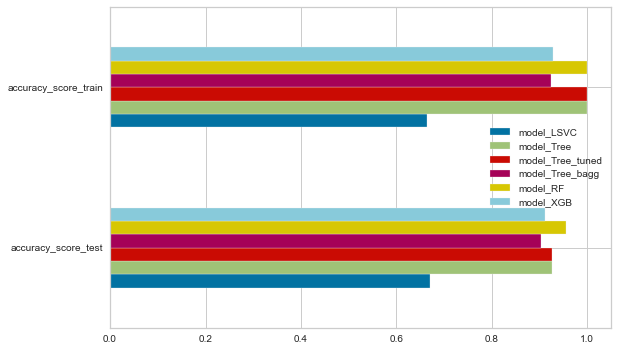

In [84]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

# 1 olanları tercih etmiyorum diğerleri içinden de model_XGB en iyisi.

# F1 Score Comparison

<AxesSubplot:>

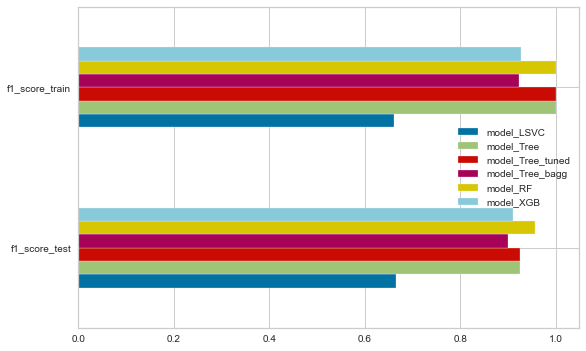

In [85]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()

# 1 olanları tercih etmiyorum diğerleri içinden de model_XGB en iyisi.